Ref : https://archive.ics.uci.edu/ml/datasets/Glass+Identification

Attribute Information:
   1. Id number: 1 to 214
   2. RI: refractive index
   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
   4. Mg: Magnesium
   5. Al: Aluminum
   6. Si: Silicon
   7. K: Potassium
   8. Ca: Calcium
   9. Ba: Barium
  10. Fe: Iron
  11. Type of glass: (class attribute)
  
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps


9. Class Distribution: (out of 214 total instances)
    -- 163 Window glass (building windows and vehicle windows)
       -- 87 float processed  
          -- 70 building windows
          -- 17 vehicle windows
       -- 76 non-float processed
          -- 76 building windows
          -- 0 vehicle windows
    -- 51 Non-window glass
       -- 13 containers
       -- 9 tableware
       -- 29 headlamps

In [53]:
#standard lib

# modules for data analysis
import numpy as np
import pandas as pd

#modules for preprocessing and machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import roc_auc_score

# modules for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#for producing consistent results when used random function
SEED = 13

In [4]:
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass_data = pd.read_csv('glass.csv', names=col_names, index_col='id')
print('Data shape : rows: %s, cols : %s'% glass_data.shape)

Data shape : rows: 214, cols : 10


In [6]:
# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
glass_data['household'] = glass_data.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass_data.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household
id,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0


### Dependent Variable - y

In [7]:
glass_data['household'].value_counts()

0    163
1     51
Name: household, dtype: int64

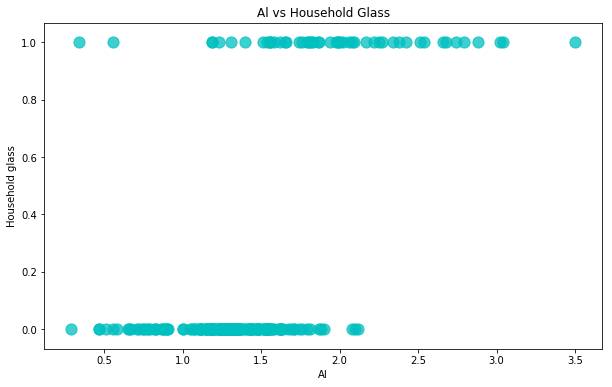

In [8]:
plt.figure(figsize=(10,6))

x = glass_data['al'].values
y = glass_data['household'].values

plt.scatter(x, y, s= 500,c="c", alpha=0.75, marker='.',label='Al')
plt.xlabel("Al")
plt.ylabel("Household glass")
plt.title('Al vs Household Glass')
plt.show()

## What if I apply linear regression

In [12]:
X = glass_data['al'].values.reshape(-1,1)
y = glass_data['household'].values

In [13]:
model = LinearRegression(fit_intercept=True)
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
xfit = np.linspace(0, 4, 100)
yfit = model.predict(xfit.reshape(-1,1))

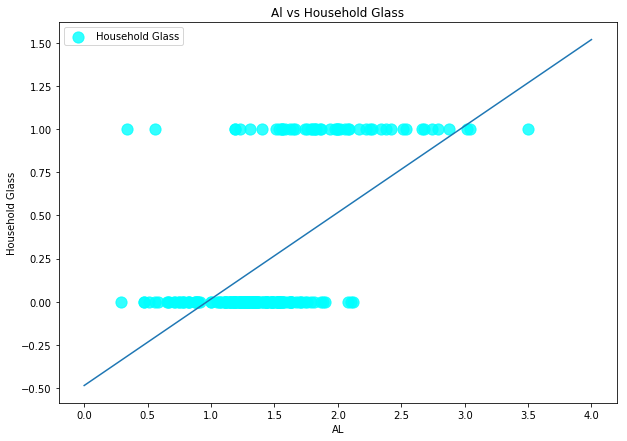

In [23]:
plt.figure(figsize=(10,7))

plt.scatter(X, y, s= 500, c="cyan", alpha=0.8, marker='.',label='Household Glass')
plt.plot(xfit, yfit)

plt.xlabel("AL")
plt.ylabel("Household Glass")
plt.title(('Al vs Household Glass'))
plt.legend(loc='upper left')
plt.show()

## Logistic Regression

In [24]:
X = glass_data['al'].values.reshape(-1,1)
y = glass_data['household'].values

In [27]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=SEED)

In [28]:
print('Train Features shape :  %s'% str(X_train.shape))
print('Train Labels shape :  %s'% str(y_train.shape))
print('Test Features shape :  %s'% str(X_test.shape))
print('Test Labels shape :  %s'% str(y_test.shape))

Train Features shape :  (143, 1)
Train Labels shape :  (143,)
Test Features shape :  (71, 1)
Test Labels shape :  (71,)


In [30]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_predict = logreg.predict(X_test)

In [31]:
y_predict

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [33]:
y_actual = y_test
y_test

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [35]:
confusion_matrix(y_test, y_predict)

array([[54,  0],
       [ 9,  8]], dtype=int64)

In [37]:
pd.crosstab(pd.Series(y_test), pd.Series(y_predict), rownames=['Reality'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Reality,,,
0,54,0,54
1,9,8,17
All,63,8,71


In [40]:
print()
print("Classification report:")
print(classification_report(y_test, y_predict))
print()


Classification report:
             precision    recall  f1-score   support

          0       0.86      1.00      0.92        54
          1       1.00      0.47      0.64        17

avg / total       0.89      0.87      0.86        71




### Using multiple features

In [44]:
X = glass_data.iloc[:,:-2].copy()
y = glass_data['household']

In [45]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=SEED)

In [46]:
print('Train Features shape :  %s'% str(X_train.shape))
print('Train Labels shape :  %s'% str(y_train.shape))
print('Test Features shape :  %s'% str(X_test.shape))
print('Test Labels shape :  %s'% str(y_test.shape))

Train Features shape :  (143, 9)
Train Labels shape :  (143,)
Test Features shape :  (71, 9)
Test Labels shape :  (71,)


In [47]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
y_predict = logreg.predict(X_test)

In [49]:
print()
print("Classification report:")
print(classification_report(y_test, y_predict))
print()


Classification report:
             precision    recall  f1-score   support

          0       0.93      0.94      0.94        54
          1       0.81      0.76      0.79        17

avg / total       0.90      0.90      0.90        71




In [51]:
y_predict_prob = logreg.predict_proba(X_test)
y_predict_prob[:10]

array([[0.94263489, 0.05736511],
       [0.00277859, 0.99722141],
       [0.00251065, 0.99748935],
       [0.04940359, 0.95059641],
       [0.2882979 , 0.7117021 ],
       [0.9579849 , 0.0420151 ],
       [0.96480093, 0.03519907],
       [0.92944385, 0.07055615],
       [0.9229279 , 0.0770721 ],
       [0.99328519, 0.00671481]])

In [56]:
y_positive_prob = y_predict_prob[:,1]

In [57]:
roc_auc_score(y_test, y_positive_prob)

0.957516339869281